In [31]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [32]:
class QuadraticState(TypedDict):

    a: int
    b: int
    c: int

    equation: str
    discriment: float
    result: str

In [39]:
def show_equation(state: QuadraticState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']}"
    return {'equation': equation}

def calculate_discriment(state: QuadraticState):
    discriment = state['b']**2 - (4*state['a']*state['c'])
    return {'discriment': discriment}

def real_roots(state: QuadraticState):
    root1 = (-state['b'] + state['discriment']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriment']**0.5)/(2*state['a'])
    result = f"The roots are {root1} and {root2}"
    return {'result': result}

def repeated_roots(state: QuadraticState):
    root = (-state['b'])/(2*state['a'])
    result = f"Equal roots are {root}"
    return {'result': result}

def no_real_roots(state: QuadraticState):
    result = f"No real roots"
    return {'result': result}

def check_condition(state: QuadraticState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state['discriment'] > 0:
        return "real_roots"
    elif state['discriment'] == 0:
        return "repeated_roots"
    else: 
        return "no_real_roots"


In [40]:
graph = StateGraph(QuadraticState)

# nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriment', calculate_discriment)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)


# edge
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriment')

graph.add_conditional_edges('calculate_discriment', check_condition)

graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()

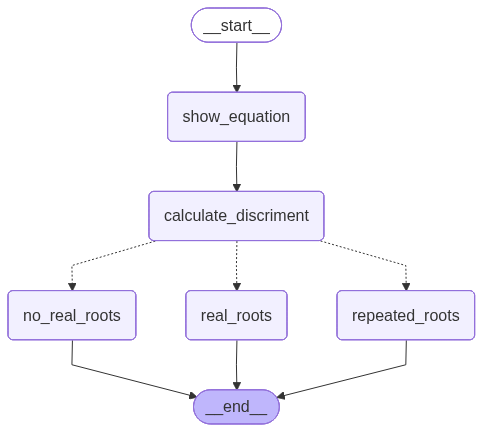

In [42]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [41]:
# Execute
initial_state = {
    'a': 2,
    'b': 4,
    'c': 2
}

workflow.invoke(initial_state)


{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x^2 + 4x + 2',
 'discriment': 0,
 'result': 'Equal roots are -1.0'}